### **Load Data dan Penyesuaian Tipe Data**

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest



In [16]:
df = pd.read_csv('D:/Downloads/dataset_edit.csv')
df

,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan
0,28828567,UD. Alif Pamungkas,Kesehatan,1,56,5497149,3347794,Tokopedia,479,Belum Terdaftar,2015,-2149355,171000000,479
1,28828568,UD. Zidanar Panji,Perdagangan,5,44,7398384,39969661,Bukalapak,464,Terdaftar,2014,32571277,147000000,464
2,28828569,UD. Winda Jayengprana,unknown,74,51,8881762,25253355,Website Sendiri,383,Belum Terdaftar,2000,16371593,375000000,383
3,28828570,UD. Damaris Satria,Jasa,89,5,9576178,20700389,Website Sendiri,986,Belum Terdaftar,2003,11124211,282000000,986
4,28828571,UD. Qasya Wiratama,Jasa,91,59,9456853,4820810,Lazada,314,Belum Terdaftar,2002,-4636043,450000000,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,288222126,UD. Syana Ilir Rian,Jasa,62,63,6854562,48239150,Website Sendiri,162,Belum Terdaftar,2003,41384588,375000000,162
13560,288222127,UD. Bela Widhi,Pendidikan,70,50,804787,35210634,Website Sendiri,180,Terdaftar,2012,34405847,360000000,180
13561,288222128,UD. Bayu Alam,Kesehatan,50,37,8211715,8874364,Lazada,802,Terdaftar,2009,662649,261000000,802
13562,288222129,UD. Olla Sudharmo Udin,Pendidikan,11,NaN,6217989,41510653,Website Sendiri,122,Belum Terdaftar,2009,35292664,132000000,122


In [17]:
obj_cols = df.select_dtypes(include='object').columns.tolist()

# Kolom yang TIDAK akan diubah
exclude_cols = ['nama_usaha', 'jenis_usaha', 'marketplace', 'status_legalitas']

# Kolom yang akan diubah jadi numerik
cols_to_convert = [col for col in obj_cols if col not in exclude_cols]

# Lakukan konversi dengan pd.to_numeric (jika ada karakter non-numerik akan diubah jadi NaN)
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
kolom_dicek = df.drop(columns=['id_umkm', 'nama_usaha'])
duplikat = df[kolom_dicek.duplicated(keep=False)]
duplikat

,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan


In [19]:
df.isna().sum()

id_umkm                   126
nama_usaha                  0
jenis_usaha                97
tenaga_kerja_perempuan    156
tenaga_kerja_laki_laki    135
aset                      142
omset                     141
marketplace               117
kapasitas_produksi        164
status_legalitas           94
tahun_berdiri             128
laba                      157
biaya_karyawan            134
jumlah_pelanggan          152
dtype: int64

In [20]:
# Buat DataFrame deskripsi
desc = pd.DataFrame(index= df.columns)
desc['type'] = df.dtypes
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] / len(df) * 100
desc['null'] = df.isnull().sum()
desc['%null'] = desc['null'] / len(df) * 100

# Gabungkan dengan statistik numerik
desc = pd.concat([desc, df.describe().T.drop('count', axis=1)], axis=1)

# Tambahkan varians
desc['variance'] = df.select_dtypes(include=['number']).var()

# Tambahkan mode (jika lebih dari satu mode, ambil yang pertama)
desc['mode'] = df.mode().iloc[0]

# Styling
desc.sort_values(by=['type', 'null']).style.background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'], color='green')\
    .bar(subset=['max'], color='red')\
    .bar(subset=['min'], color='pink')

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max,variance,mode
id_umkm,float64,13438,13438,99.071070,126,0.928930,260845143.759860,79692915.275337,28828567.000000,288211957.250000,288215347.500000,288218745.750000,288222130.000000,6350960745081962.000000,28828567.000000
tahun_berdiri,float64,13436,25,0.184311,128,0.943674,2012.028654,7.263471,2000.000000,2006.000000,2012.000000,2018.000000,2024.000000,52.758018,2024.000000
biaya_karyawan,float64,13430,199,1.467119,134,0.987909,296371183.916605,122896125.406971,0.000000,207000000.000000,297000000.000000,384000000.000000,594000000.000000,15103457640045850.000000,312000000.000000
tenaga_kerja_laki_laki,float64,13429,100,0.737246,135,0.995282,49.138432,29.045802,0.000000,24.000000,49.000000,74.000000,99.000000,843.658598,47.000000
omset,float64,13423,13421,98.945739,141,1.039516,25556075.975192,14214044.823177,1000509.000000,13242694.500000,25611802.000000,37722343.500000,49999699.000000,202039070235273.968750,21258178.000000
aset,float64,13422,13409,98.857269,142,1.046889,5223369.174639,2736182.966455,500233.000000,2842985.000000,5211246.500000,7573605.500000,9999760.000000,7486697225917.323242,671428.000000
jumlah_pelanggan,float64,13412,990,7.298732,152,1.120613,499.655309,285.428202,10.000000,250.000000,501.000000,745.250000,999.000000,81469.258630,620.000000
tenaga_kerja_perempuan,float64,13408,100,0.737246,156,1.150103,49.699359,29.050398,0.000000,24.000000,50.000000,75.000000,99.000000,843.925644,3.000000
laba,float64,13407,13405,98.827779,157,1.157476,20335914.832774,14501877.087248,-8838836.000000,8035038.000000,20474087.000000,32651497.500000,49199297.000000,210304439053657.437500,32987071.000000
kapasitas_produksi,float64,13400,990,7.298732,164,1.209083,499.804776,285.718098,10.000000,250.000000,501.000000,746.000000,999.000000,81634.831800,620.000000


### **Feature Engineering**

In [21]:
df["net_profit_margin"] = (df["laba"] / df["omset"])*100
df["rasio_biaya_karyawan_omset"] = (df["biaya_karyawan"] / df["omset"])


In [22]:
df["persentase_laki"] = (df["tenaga_kerja_laki_laki"] / (df["tenaga_kerja_laki_laki"]+df["tenaga_kerja_perempuan"])) * 100

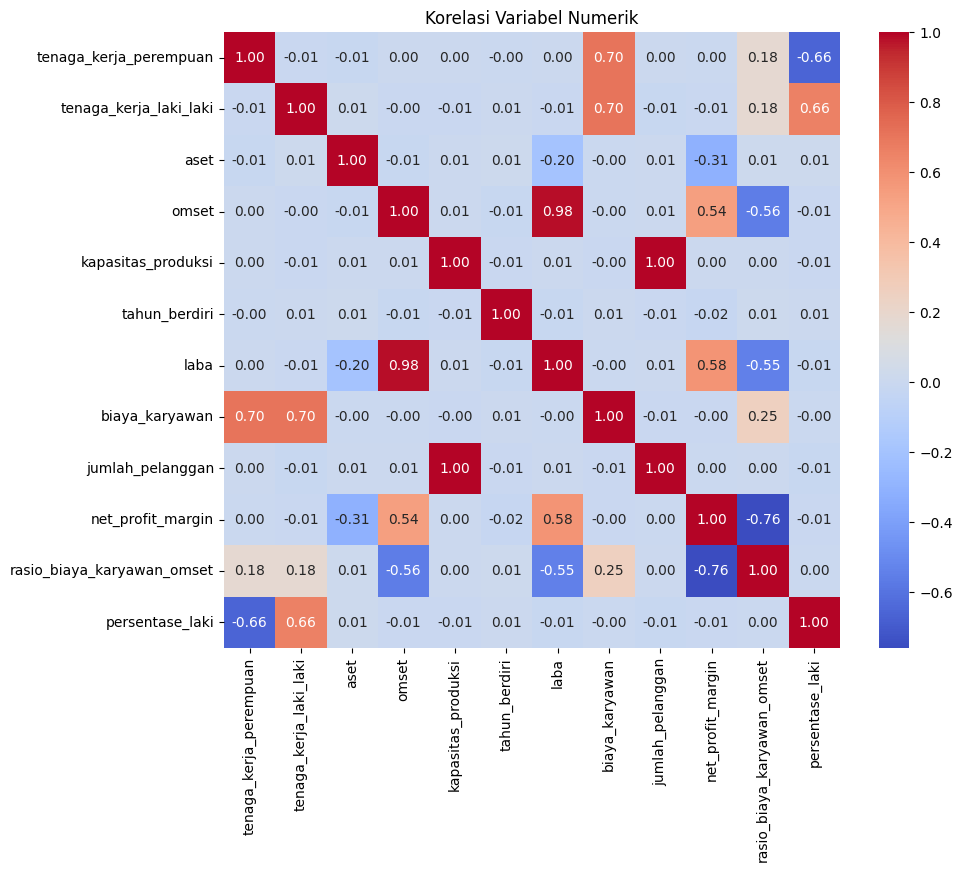

In [23]:

numerical_features = df.select_dtypes(include=['number']).columns.tolist()
if 'id_umkm' in numerical_features:
    numerical_features.remove('id_umkm')

data_num = df[numerical_features]
plt.figure(figsize=(10, 8))
corr = data_num.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korelasi Variabel Numerik")
plt.show()

In [24]:
df[["jumlah_pelanggan", "kapasitas_produksi"]]

,jumlah_pelanggan,kapasitas_produksi
0,479.0,479.0
1,464.0,464.0
2,383.0,383.0
3,986.0,986.0
4,314.0,314.0
...,...,...
13559,162.0,162.0
13560,180.0,180.0
13561,802.0,802.0
13562,122.0,122.0


In [25]:
df = df.drop(columns='kapasitas_produksi')

### **Penanganan Missing Value**

<Axes: >

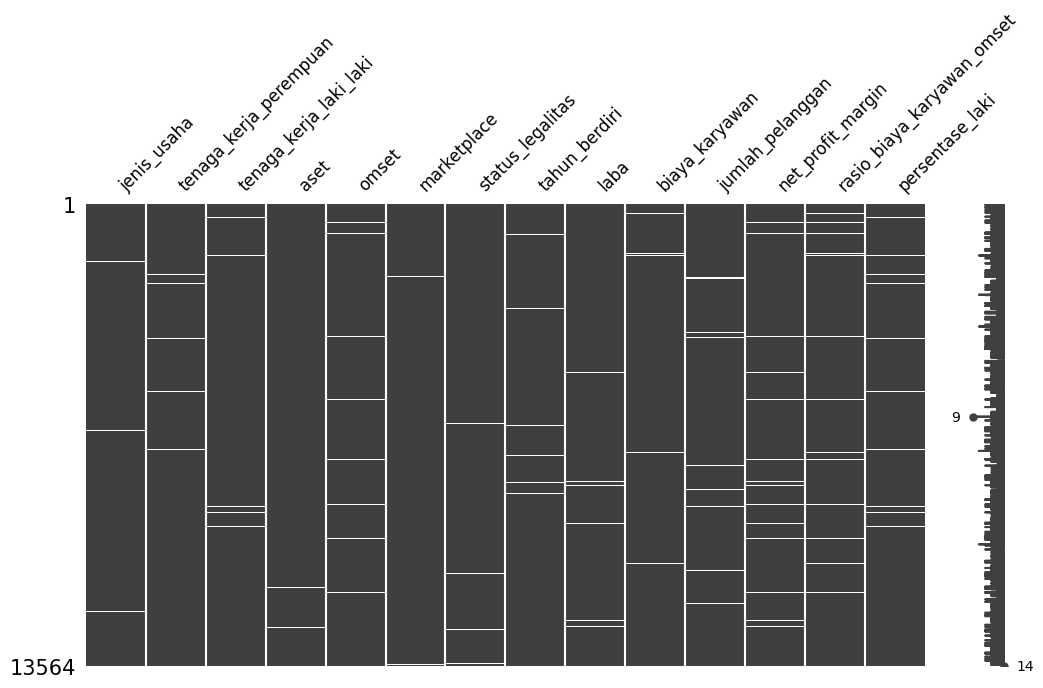

In [26]:
import missingno as msno

# Drop kolom id_umkm dan nama_usaha dari DataFrame
df_mno = df.drop(columns=['id_umkm', 'nama_usaha'])

# Tampilkan visualisasi missing value
msno.matrix(df_mno, figsize=(12, 6), fontsize=12)


In [27]:
import pandas as pd

# Kolom yang akan dikecualikan
exclude_cols = ['id_umkm', 'nama_usaha']

# Hitung persentase missing value pada kolom selain exclude_cols
missing_percent = df.drop(columns=exclude_cols).isnull().mean() * 100

# Buat DataFrame rapi
missing_df = missing_percent.reset_index()
missing_df.columns = ['Fitur', 'Persentase Missing (%)']

# Urutkan dari yang paling tinggi missing value-nya
missing_df = missing_df.sort_values(by='Persentase Missing (%)', ascending=False).reset_index(drop=True)
missing_df


,Fitur,Persentase Missing (%)
0,net_profit_margin,2.196992
1,persentase_laki,2.160130
2,rasio_biaya_karyawan_omset,2.027426
3,laba,1.157476
4,tenaga_kerja_perempuan,1.150103
5,jumlah_pelanggan,1.120613
6,aset,1.046889
7,omset,1.039516
8,tenaga_kerja_laki_laki,0.995282
9,biaya_karyawan,0.987909


In [28]:

# Copy data
df_clean = df.copy()

# 1. Drop kolom ID/nama
df_clean = df_clean.drop(['id_umkm', 'nama_usaha'], axis=1)

# 2. Pisahkan kolom numerik dan kategorik
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns

# 3. Imputasi numerik: IterativeImputer
imp_num = IterativeImputer(random_state=42)
df_clean[numerical_cols] = imp_num.fit_transform(df_clean[numerical_cols])

# 4. Imputasi kategorik: RandomForestClassifier
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        not_null = df_clean[df_clean[col].notnull()]
        null = df_clean[df_clean[col].isnull()]
        
        rf = RandomForestClassifier()
        rf.fit(not_null.drop(columns=categorical_cols), not_null[col])
        
        df_clean.loc[df_clean[col].isnull(), col] = rf.predict(null.drop(columns=categorical_cols))



### **Scaling dan Encoding**

In [29]:
# Pisahkan kolom one-hot dan kolom numerik asli
df_clean2 = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
ohe_cols = df_clean2.columns.difference(numerical_cols)
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_clean2[numerical_cols])

# Gabungkan kembali dengan one-hot
import numpy as np
X_combined = np.concatenate([X_num_scaled, df_clean2[ohe_cols].values], axis=1)


### **Isolation Forest**

In [30]:
model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(X_combined)

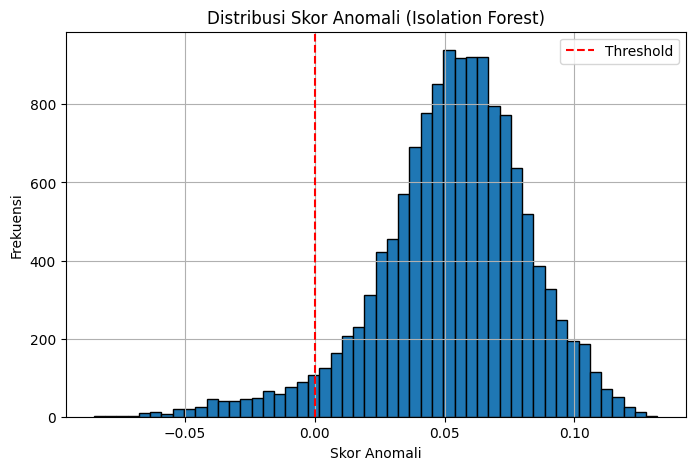

In [32]:
scores = model.decision_function(X_combined)  
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=50, edgecolor='black')
plt.title('Distribusi Skor Anomali (Isolation Forest)')
plt.xlabel('Skor Anomali')
plt.ylabel('Frekuensi')
plt.axvline(np.percentile(scores, 5), color='red', linestyle='--', label='Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
anomalies = df[df['anomaly'] == -1]
anomalies.describe()

,id_umkm,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,net_profit_margin,rasio_biaya_karyawan_omset,persentase_laki,anomaly
count,6.710000e+02,671.000000,677.000000,6.720000e+02,6.460000e+02,675.000000,6.710000e+02,6.770000e+02,671.000000,638.000000,644.000000,669.000000,679.0
mean,2.638621e+08,50.576751,48.756278,6.333094e+06,4.526372e+06,2012.634074,-1.016182e+06,2.989586e+08,506.102832,-179.090072,137.259076,48.844607,-1.0
std,7.571307e+07,32.442413,32.672908,2.786963e+06,8.385702e+06,7.745643,1.042749e+07,1.430027e+08,298.480145,173.395193,98.665914,27.784984,0.0
min,2.882857e+07,0.000000,0.000000,5.126280e+05,1.000509e+06,2000.000000,-8.838836e+06,6.000000e+06,10.000000,-804.094142,0.404824,0.000000,-1.0
25%,2.882120e+08,19.000000,17.000000,4.078959e+06,1.677696e+06,2005.000000,-5.701300e+06,1.920000e+08,231.500000,-279.280758,62.364891,26.153846,-1.0
50%,2.882152e+08,54.000000,50.000000,7.148395e+06,2.521067e+06,2013.000000,-4.009381e+06,3.030000e+08,520.000000,-151.446600,119.573408,49.645390,-1.0
75%,2.882184e+08,81.000000,79.000000,8.734135e+06,3.679470e+06,2020.000000,-1.333216e+06,4.050000e+08,770.000000,-56.466117,188.258572,69.158879,-1.0
max,2.882221e+08,99.000000,99.000000,9.999760e+06,4.958723e+07,2024.000000,4.871884e+07,5.850000e+08,998.000000,98.846365,500.272698,100.000000,-1.0


In [34]:
normal = df[df['anomaly'] == 1]
normal.describe()

,id_umkm,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,net_profit_margin,rasio_biaya_karyawan_omset,persentase_laki,anomaly
count,1.276700e+04,12737.000000,12752.000000,1.275000e+04,1.277700e+04,12761.000000,1.273600e+04,1.275300e+04,12741.000000,12628.000000,12645.000000,12602.000000,12885.0
mean,2.606866e+08,49.653137,49.158720,5.164880e+06,2.661933e+07,2011.996630,2.146086e+07,2.962338e+08,499.315752,69.592309,18.116059,49.761245,1.0
std,7.989628e+07,28.861328,28.841785,2.721064e+06,1.360928e+07,7.235984,1.379773e+07,1.217409e+08,284.732420,34.807415,21.826840,24.314338,0.0
min,2.882857e+07,0.000000,0.000000,5.002330e+05,1.166487e+06,2000.000000,-7.516505e+06,0.000000e+00,10.000000,-337.932318,0.000000,0.000000,1.0
25%,2.882120e+08,25.000000,24.000000,2.791654e+06,1.484122e+07,2006.000000,9.661708e+06,2.070000e+08,251.000000,64.986008,7.071221,32.881218,1.0
50%,2.882154e+08,50.000000,49.000000,5.126779e+06,2.681598e+07,2012.000000,2.159436e+07,2.940000e+08,500.000000,80.481052,11.137470,49.536997,1.0
75%,2.882188e+08,75.000000,74.000000,7.474964e+06,3.830749e+07,2018.000000,3.313404e+07,3.840000e+08,744.000000,89.387435,20.050504,66.900194,1.0
max,2.882221e+08,99.000000,99.000000,9.999711e+06,4.999970e+07,2024.000000,4.919930e+07,5.940000e+08,999.000000,98.923414,439.782012,100.000000,1.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14256\3400903770.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='anomaly', y=col, palette=palette)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14256\3400903770.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='anomaly', y=col, palette=palette)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14256\3400903770.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='anomaly', y=col, palette=palette)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14256\3400903770.py

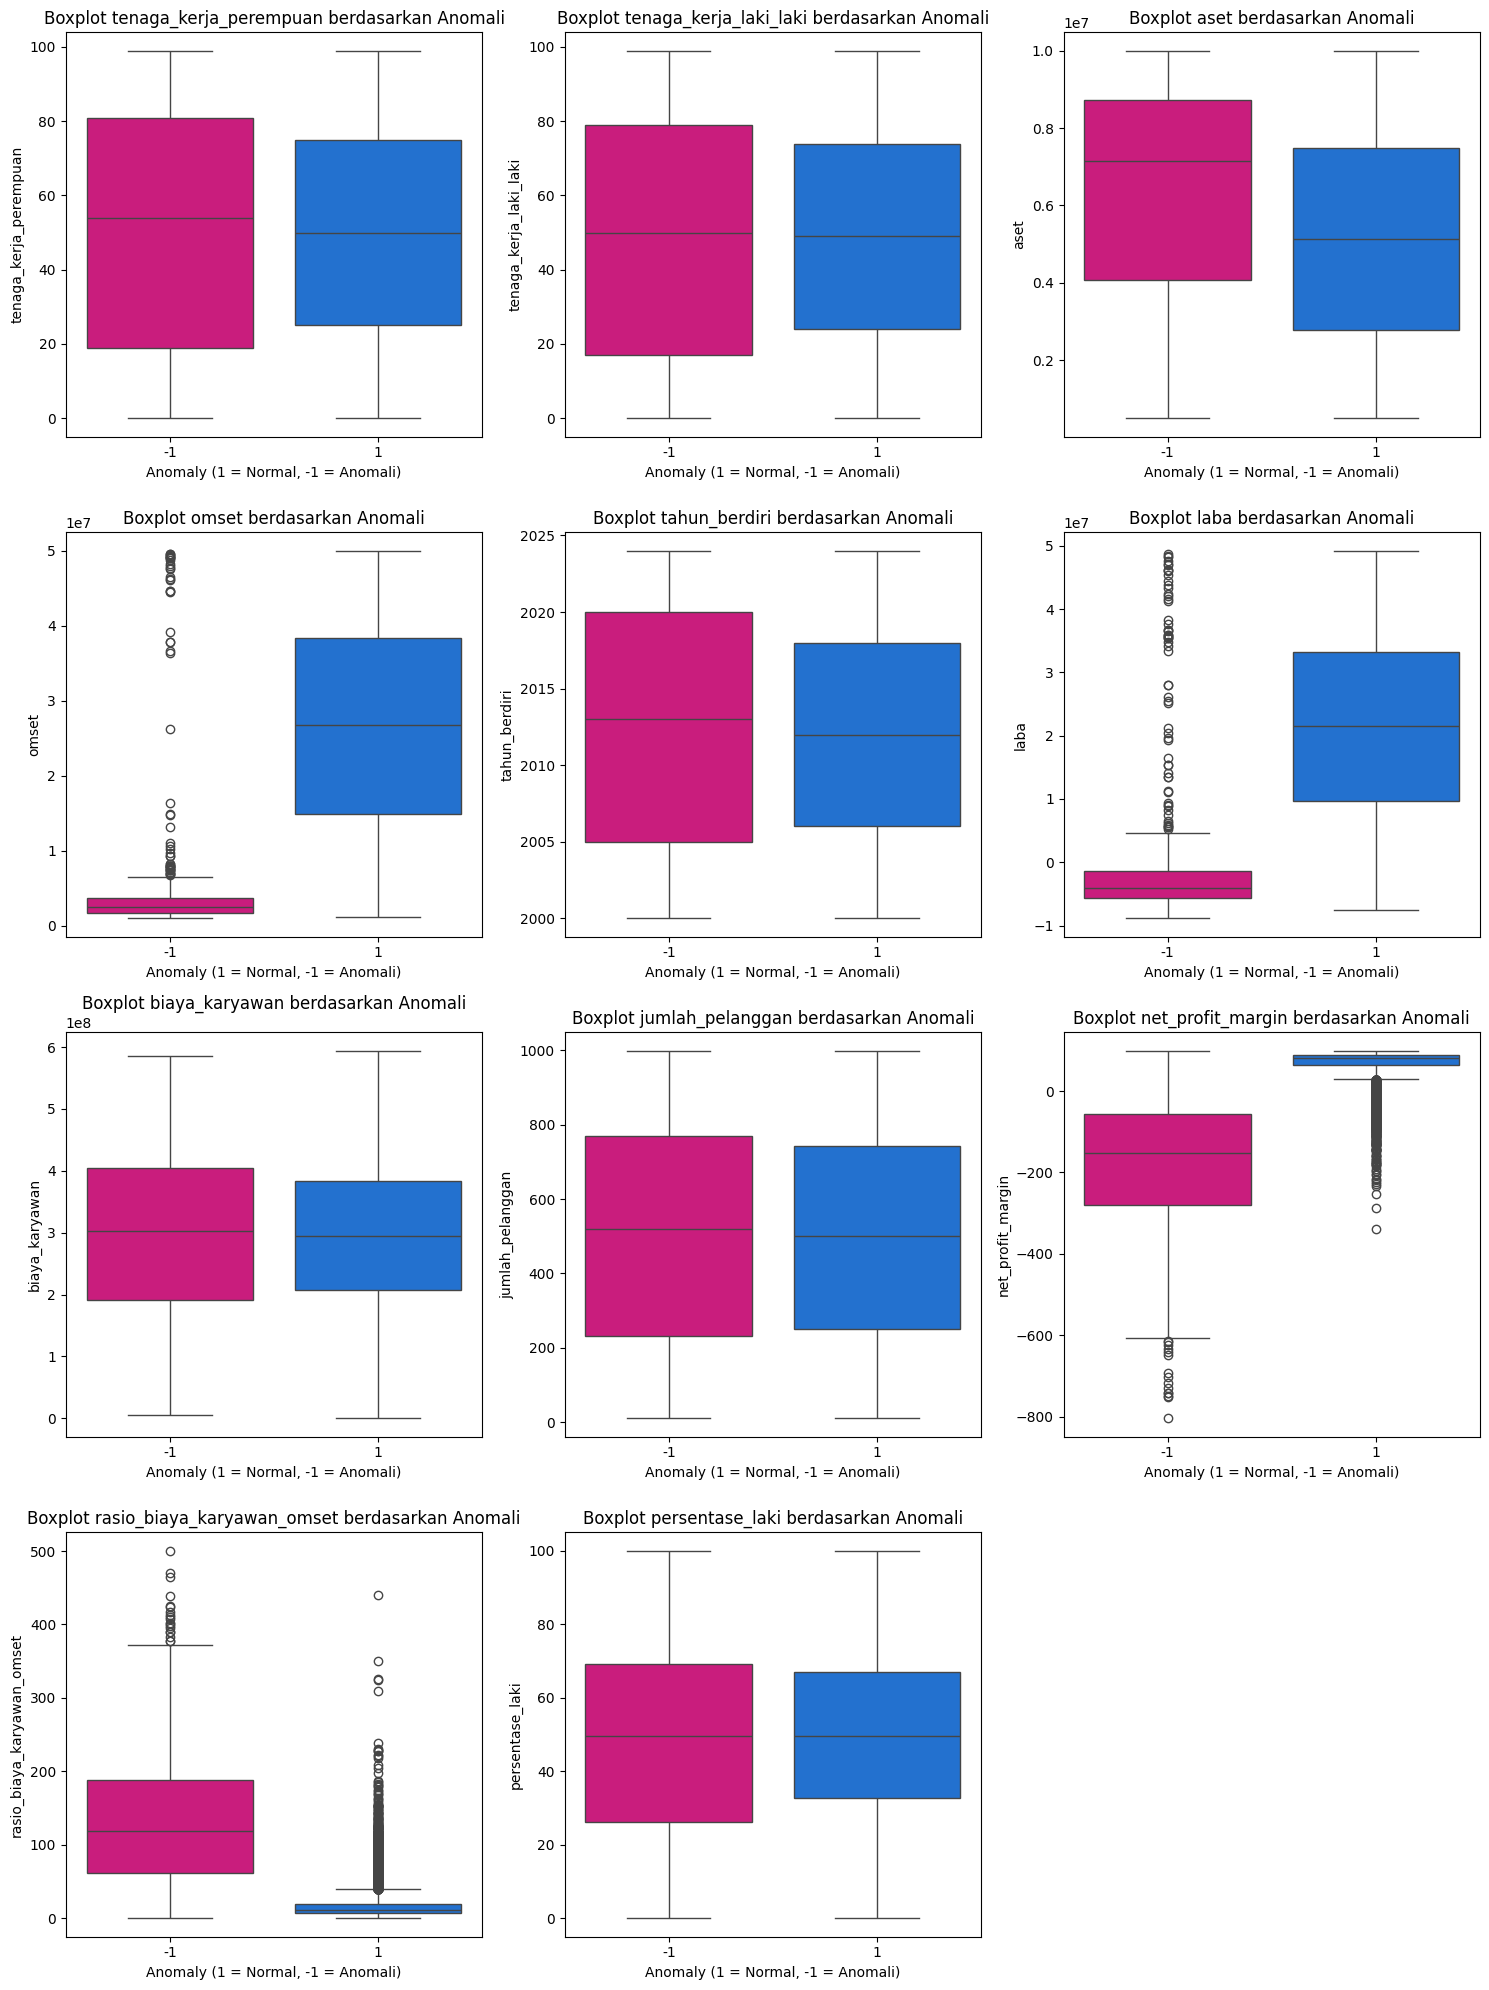

In [35]:

import math

# Hitung jumlah subplot baris
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Ukuran gambar menyesuaikan grid
plt.figure(figsize=(15, n_rows * 5))

# Warna lebih muda untuk normal dan anomali
palette = { '-1': '#E60080', '1': '#066FEC' }

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x='anomaly', y=col, palette=palette)
    plt.title(f'Boxplot {col} berdasarkan Anomali')
    plt.xlabel('Anomaly (1 = Normal, -1 = Anomali)')
    plt.tight_layout()

plt.show()


In [249]:
anomalies[anomalies['laba']<0]

,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,net_profit_margin,rasio_biaya_karyawan_omset,persentase_laki,anomaly
0,28828567.0,UD. Alif Pamungkas,Kesehatan,1.0,56.0,5497149.0,3347794.0,Tokopedia,Belum Terdaftar,2015.0,-2149355.0,171000000.0,479.0,-64.202128,51.078412,98.245614,-1
4,28828571.0,UD. Qasya Wiratama,Jasa,91.0,59.0,9456853.0,4820810.0,Lazada,Belum Terdaftar,2002.0,-4636043.0,450000000.0,314.0,-96.167304,93.345309,39.333333,-1
32,28828599.0,UD. Damar Panji,Kesehatan,94.0,52.0,3862258.0,2895777.0,Lazada,Belum Terdaftar,2008.0,-966481.0,438000000.0,195.0,-33.375533,151.254741,35.616438,-1
61,28828628.0,UD. Gema Prana,Jasa,41.0,50.0,9929308.0,2320739.0,Shopee,Terdaftar,2024.0,-7608569.0,273000000.0,502.0,-327.851128,117.634943,54.945055,-1
101,28828668.0,UD. Krisna Segar,NaN,30.0,77.0,8955003.0,2617312.0,Shopee,Terdaftar,2024.0,-6337691.0,321000000.0,977.0,-242.145033,122.644912,71.962617,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,288221834.0,UD. Heri Galang,Kesehatan,48.0,42.0,6484371.0,2086106.0,Website Sendiri,Belum Terdaftar,2016.0,-4398265.0,270000000.0,652.0,-210.836122,129.427747,46.666667,-1
13336,288221903.0,UD. Deni Cerah,Jasa,2.0,95.0,6789334.0,3212959.0,Tokopedia,Belum Terdaftar,2021.0,-3576375.0,291000000.0,63.0,-111.310944,90.570717,97.938144,-1
13378,288221945.0,UD. Bambang Anggrek,Jasa,49.0,62.0,2013825.0,1174164.0,Website Sendiri,Terdaftar,2017.0,-839661.0,333000000.0,21.0,-71.511390,283.606038,55.855856,-1
13522,288222089.0,UD. Hanafi Nirmala Iqra,Perdagangan,82.0,31.0,7891696.0,3045186.0,Website Sendiri,Terdaftar,2018.0,-4846510.0,339000000.0,410.0,-159.153168,111.323249,27.433628,-1


In [250]:
552/679

0.812960235640648